### Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [52]:
df = pd.read_csv("AMES_Final_DF.csv")

In [53]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
df.shape

(2925, 274)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [56]:
df.isnull().sum()

Lot Frontage              0
Lot Area                  0
Overall Qual              0
Overall Cond              0
Year Built                0
                         ..
Sale Condition_AdjLand    0
Sale Condition_Alloca     0
Sale Condition_Family     0
Sale Condition_Normal     0
Sale Condition_Partial    0
Length: 274, dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2925.0,69.683099,21.344161,0.0,60.0,70.0,80.0,313.0
Lot Area,2925.0,10109.861538,7785.509739,1300.0,7438.0,9430.0,11526.0,215245.0
Overall Qual,2925.0,6.091624,1.406386,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.323761,30.228826,1872.0,1954.0,1973.0,2000.0,2010.0
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,0.004103,0.063931,0.0,0.0,0.0,0.0,1.0
Sale Condition_Alloca,2925.0,0.007863,0.088341,0.0,0.0,0.0,0.0,1.0
Sale Condition_Family,2925.0,0.015726,0.124437,0.0,0.0,0.0,0.0,1.0
Sale Condition_Normal,2925.0,0.824615,0.380361,0.0,1.0,1.0,1.0,1.0


In [59]:
df.nunique()

Lot Frontage               151
Lot Area                  1956
Overall Qual                10
Overall Cond                 9
Year Built                 118
                          ... 
Sale Condition_AdjLand       2
Sale Condition_Alloca        2
Sale Condition_Family        2
Sale Condition_Normal        2
Sale Condition_Partial       2
Length: 274, dtype: int64

### Visualizing the Labeled Column

C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

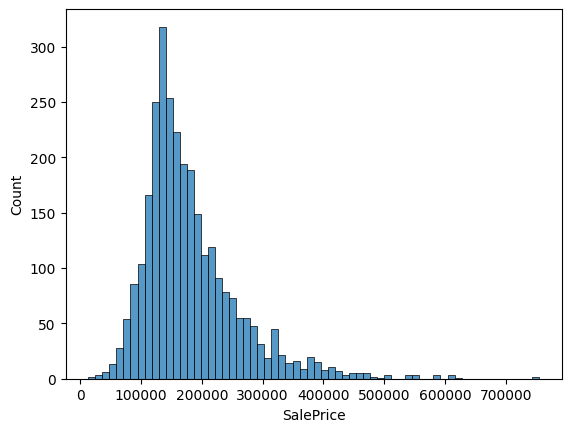

In [60]:
import seaborn as sn

sn.histplot(df['SalePrice'])

### Train Test Split

In [61]:
X=df.drop('SalePrice', axis=1)
Y=df['SalePrice']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.1, random_state=101)

In [64]:
print(X.shape,X_train.shape,X_test.shape)

(2925, 273) (2632, 273) (293, 273)


### Scaling

In [65]:
from sklearn.preprocessing import  StandardScaler

scaler=StandardScaler()

In [66]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [67]:
X_train

array([[-0.8384808 , -0.50803335, -0.05639001, ..., -0.13038998,
         0.46443986, -0.30126134],
       [-1.03015138, -0.50803335,  1.35711957, ..., -0.13038998,
         0.46443986, -0.30126134],
       [ 1.26989557,  0.06576361,  0.65036478, ..., -0.13038998,
         0.46443986, -0.30126134],
       ...,
       [-0.45513964, -0.42320424, -0.05639001, ..., -0.13038998,
         0.46443986, -0.30126134],
       [ 0.07195445, -0.42000314, -0.7631448 , ..., -0.13038998,
         0.46443986, -0.30126134],
       [ 0.0880722 ,  0.30477899,  1.35711957, ..., -0.13038998,
         0.46443986, -0.30126134]])

### Model Training

#### We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn

In [68]:
from sklearn.linear_model import ElasticNetCV

In [69]:
elastic_model=ElasticNetCV()

In [70]:
elastic_model.fit(X_train,Y_train)

ElasticNetCV()

In [71]:
y_pred=elastic_model.predict(X_test)

### Model Evaluation

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [73]:
mean_absolute_error(Y_test,y_pred)

45077.03686020436

In [74]:
mean_squared_error(Y_test,y_pred)

3759071366.9586053

**Root Mean Squared Error**

In [75]:
root_mean_squared_error(Y_test,y_pred)

61311.266231897425

**r2-score**

In [76]:
r2_score(Y_test,y_pred)

0.27933244263328894

### Grid Search

In [77]:
param_grid={
    'l1_ratio': [.1, .5, .7,.9, .95, .99, 1],
    'n_alphas':[0.1,1,5,10,50,100]
}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
e_model=ElasticNetCV()

In [81]:
grid_model=GridSearchCV(e_model, param_grid=param_grid,scoring='neg_mean_squared_error',cv=5, verbose=1)

In [82]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklear

GridSearchCV(cv=5, estimator=ElasticNetCV(),
             param_grid={'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                         'n_alphas': [0.1, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

#### Displaying the best combination of parameters of this elasticnet model

**Best Parameters**

In [83]:
grid_model.best_params_

{'l1_ratio': 1, 'n_alphas': 100}

**Best Score**

In [84]:
grid_model.best_score_

-516652706.8216238

**Best Estimators**

In [85]:
grid_model.best_estimator_

ElasticNetCV(l1_ratio=1)

### Model Evaluation after GridSearch

In [86]:
final_pred=grid_model.predict(X_test)

**Mean Absolute Error**

In [87]:
mean_absolute_error(Y_test,final_pred)

14186.390457864794

**Root Mean Squared Error**

In [88]:
root_mean_squared_error(Y_test,final_pred)

20558.75100803517

**r2 score**

In [89]:
r2_score(Y_test,final_pred)

0.9189696240037399

### As you can see performing a hyper-parameter tuning the model gives us the best results.

----